In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from joblib import Parallel, delayed
from SALib.sample import saltelli
from SALib.analyze import sobol

# Load only the required columns
cols_to_load = ['W', 'S', 'Q', 'U', 'H', 'D50', 'D84', 'R', 'qs']
df = pd.read_excel(r'D:/paper/qb/data/lab_data.xlsx', usecols=cols_to_load)

X = df.loc[:, ['W', 'S', 'Q', 'U', 'H', 'D50', 'D84', 'R']].values
y = df.loc[:, ['qs']].values

scaler1 = MinMaxScaler().fit(X)
X1 = scaler1.transform(X)

scaler2 = MinMaxScaler().fit(y)
y1 = scaler2.transform(y)

# Define the model function
def my_model(inputs):
    W, S, Q, U, H, D50, D84, R = inputs.T
    x_test = np.column_stack((W, S, Q, U, H, D50, D84, R))
    y_pred = svr_rbf.predict(x_test)
    return y_pred

# Define the parameter bounds
problem = {
    'num_vars': 8,
    'names': ['W', 'S', 'Q', 'U', 'H', 'D50', 'D84', 'R'],
    'bounds': [[0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]]
}

# Generate the parameter samples using Saltelli's sampling
param_samples = saltelli.sample(problem, N=100000, calc_second_order=False)

# Initialize the SVR model
svr_rbf = SVR(kernel="rbf", C=100, gamma='scale', epsilon=0.001)

# Fit the SVR model
md = svr_rbf.fit(X1, y1)

# Evaluate the model for each parameter sample
y_pred_samples = my_model(param_samples)

# Perform the Sobol' sensitivity analysis
Si = sobol.analyze(problem, y_pred_samples, calc_second_order=False)

# Print the first-order and total sensitivity indices
for i, param_name in enumerate(['W', 'S', 'Q', 'U', 'H', 'D50', 'D84', 'R']):
    print(f"{param_name}:")
    print("  First-order sensitivity:", Si['S1'][i])
    print("  Total sensitivity:", Si['ST'][i])


C:\Users\Mehdi\AppData\Local\Temp\ipykernel_3528\2314819713.py:39: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_samples = saltelli.sample(problem, N=100000, calc_second_order=False)
c:\Users\Mehdi\anaconda3\lib\site-packages\SALib\sample\saltelli.py:109: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (100000) is equal to `2^n`.
        
  warnings.warn(msg)
c:\Users\Mehdi\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


W:
  First-order sensitivity: 0.020893986316097624
  Total sensitivity: 0.37351909355744556
S:
  First-order sensitivity: 0.059987387167622246
  Total sensitivity: 0.42659295096982786
Q:
  First-order sensitivity: 0.004793151718913224
  Total sensitivity: 0.32917312230905577
U:
  First-order sensitivity: 0.09231365698406258
  Total sensitivity: 0.5584332411855002
H:
  First-order sensitivity: 0.013604031072092501
  Total sensitivity: 0.2579223267159358
D50:
  First-order sensitivity: 0.0019501888889130509
  Total sensitivity: 0.1711505352125948
D84:
  First-order sensitivity: -0.001740145982563055
  Total sensitivity: 0.17822520147856763
R:
  First-order sensitivity: 0.015633114481120935
  Total sensitivity: 0.2511305896623891


W:
  First-order sensitivity: 0.020893986316097624
  Total sensitivity: 0.37351909355744556


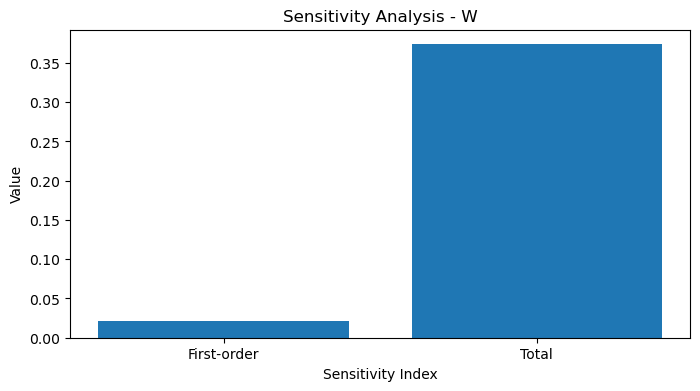

S:
  First-order sensitivity: 0.059987387167622246
  Total sensitivity: 0.42659295096982786


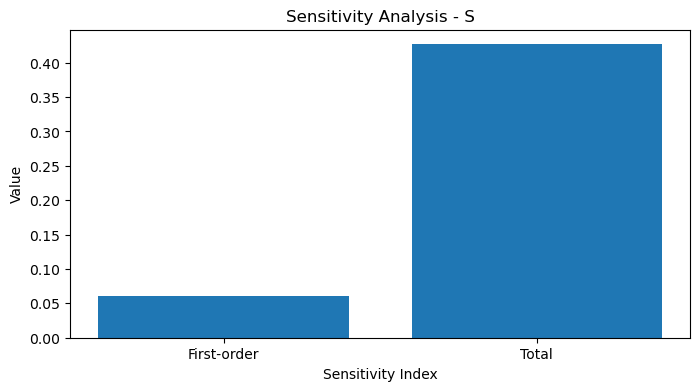

Q:
  First-order sensitivity: 0.004793151718913224
  Total sensitivity: 0.32917312230905577


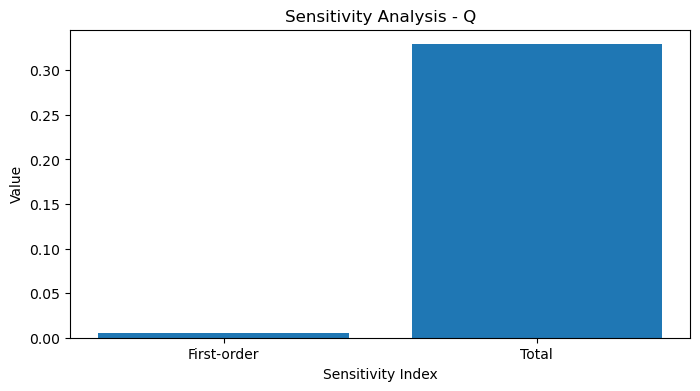

U:
  First-order sensitivity: 0.09231365698406258
  Total sensitivity: 0.5584332411855002


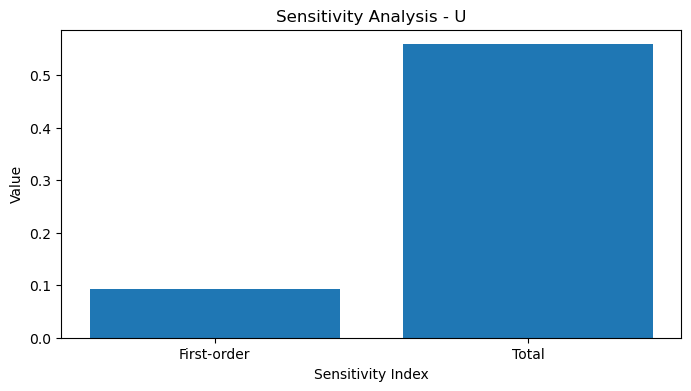

H:
  First-order sensitivity: 0.013604031072092501
  Total sensitivity: 0.2579223267159358


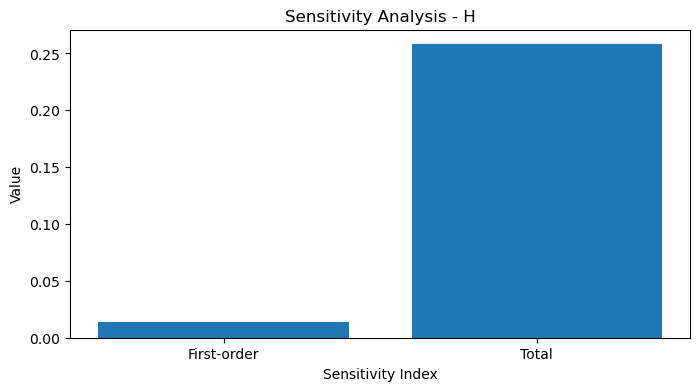

D50:
  First-order sensitivity: 0.0019501888889130509
  Total sensitivity: 0.1711505352125948


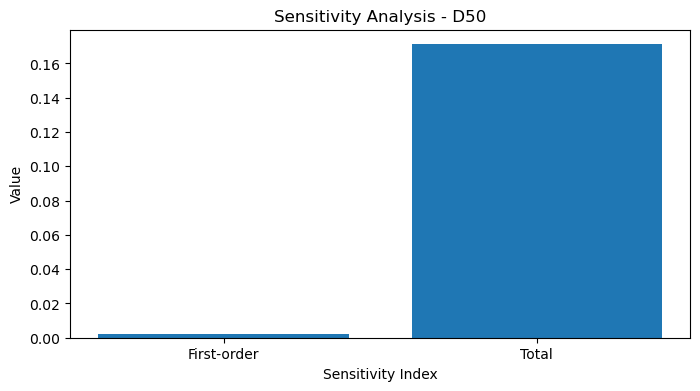

D84:
  First-order sensitivity: -0.001740145982563055
  Total sensitivity: 0.17822520147856763


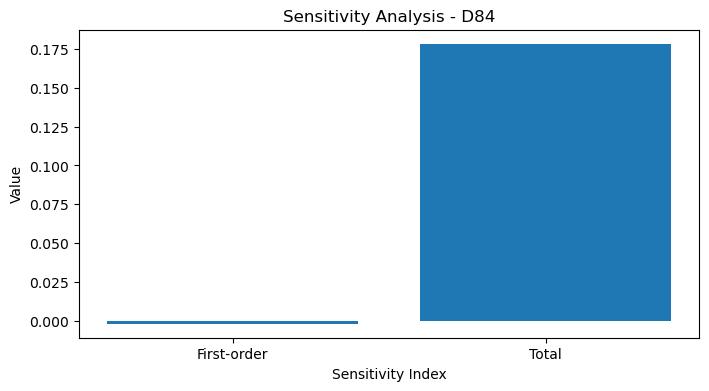

R:
  First-order sensitivity: 0.015633114481120935
  Total sensitivity: 0.2511305896623891


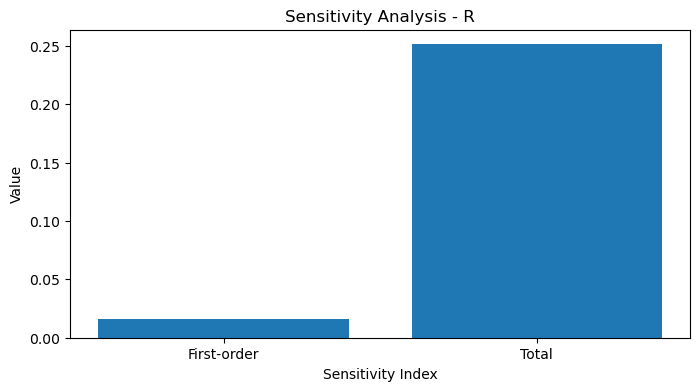

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ...

# Print the first-order and total sensitivity indices
for i, param_name in enumerate(['W', 'S', 'Q', 'U', 'H', 'D50', 'D84', 'R']):
    print(f"{param_name}:")
    print("  First-order sensitivity:", Si['S1'][i])
    print("  Total sensitivity:", Si['ST'][i])
    
    # Plot the sensitivity indices
    plt.figure(figsize=(8, 4))
    indices = [Si['S1'][i], Si['ST'][i]]
    labels = ['First-order', 'Total']
    
    plt.bar(labels, indices)
    plt.xlabel('Sensitivity Index')
    plt.ylabel('Value')
    plt.title(f'Sensitivity Analysis - {param_name}')
    plt.show()
